In [1]:
import rl_ctrl_sat_aw
from scipy.integrate import ode
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook

## Instantiate system

In [3]:
model = rl_ctrl_sat_aw.rl_ctrl_sat_aw_class()

## Solve steady state

In [4]:
model.ss()

In [5]:
model.report_x()

i     =  1.00
xi    =  0.01


In [6]:
model.report_y()

y     =  0.10
v     =  0.10


In [43]:
model = rl_ctrl_sat_aw.rl_ctrl_sat_aw_class()
model.set_value('i_ref',0.0)
model.set_value('K_aw',10.0)
model.ss()
model.run([{'t_end':0.1,'i_ref':0.0,'Dt':0.001,'decimation':1}])
model.run([{'t_end':0.5,'i_ref':15.0}])
model.post();

<IPython.core.display.Javascript object>


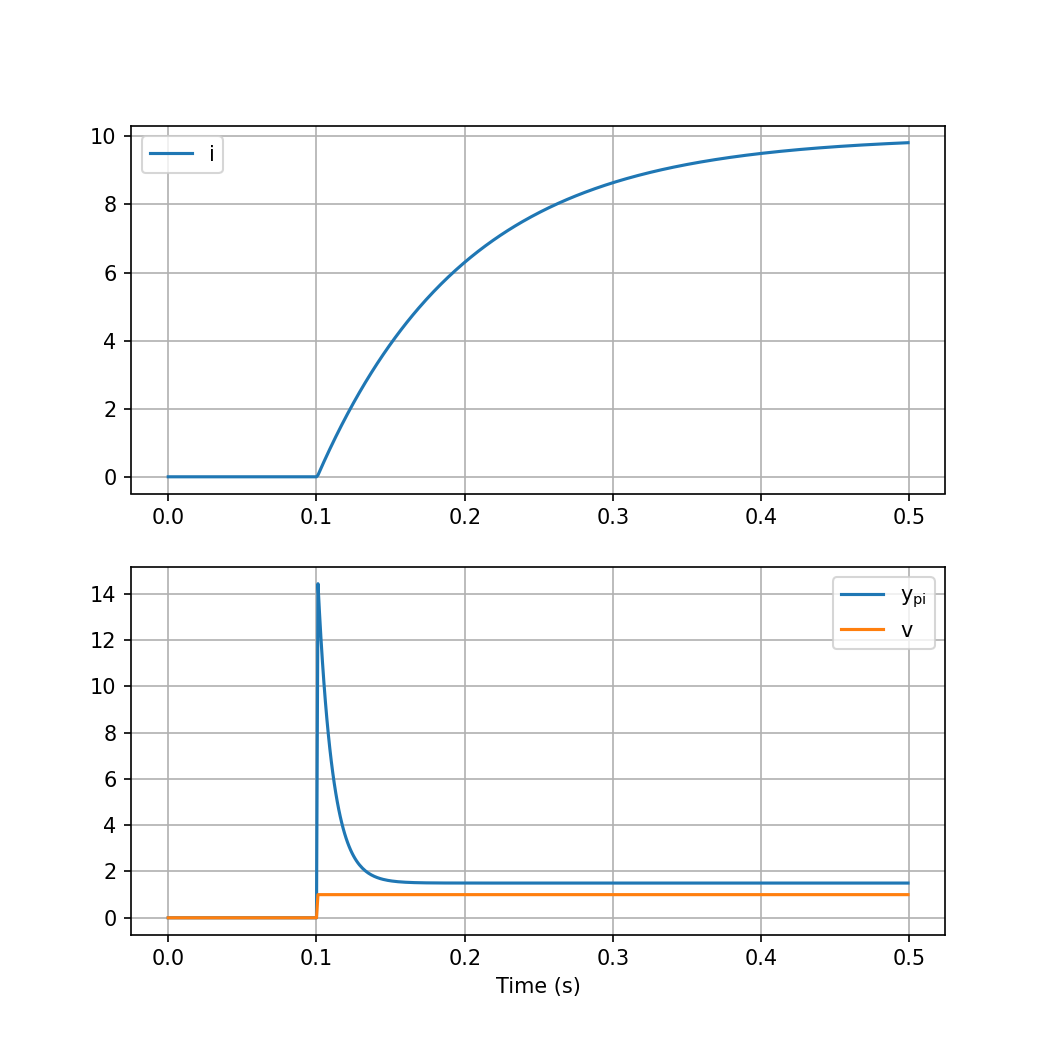

In [44]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(7, 7))
axes[0].plot(model.T,model.get_values('i'), label='$\sf i$')
axes[1].plot(model.T,model.get_values('y'),label='$\sf y_{pi}$')
axes[1].plot(model.T,model.get_values('v'),label='$\sf v$')
for ax in axes:
    ax.grid()
    ax.legend()
ax.set_xlabel('Time (s)')

axes[1].legend(loc='best')

## Run multiple simulations

In [21]:
def sim_iref(i_ref):
    
    model = rl_ctrl_sat_aw.rl_ctrl_sat_aw_class()
    model.set_value('i_ref',0.0)
    model.ss()
    model.run([{'t_end':0.1,'i_ref':0.0,'Dt':0.0001}])
    model.run([{'t_end':0.5,'i_ref':i_ref}])
    model.post()
    return model

<IPython.core.display.Javascript object>


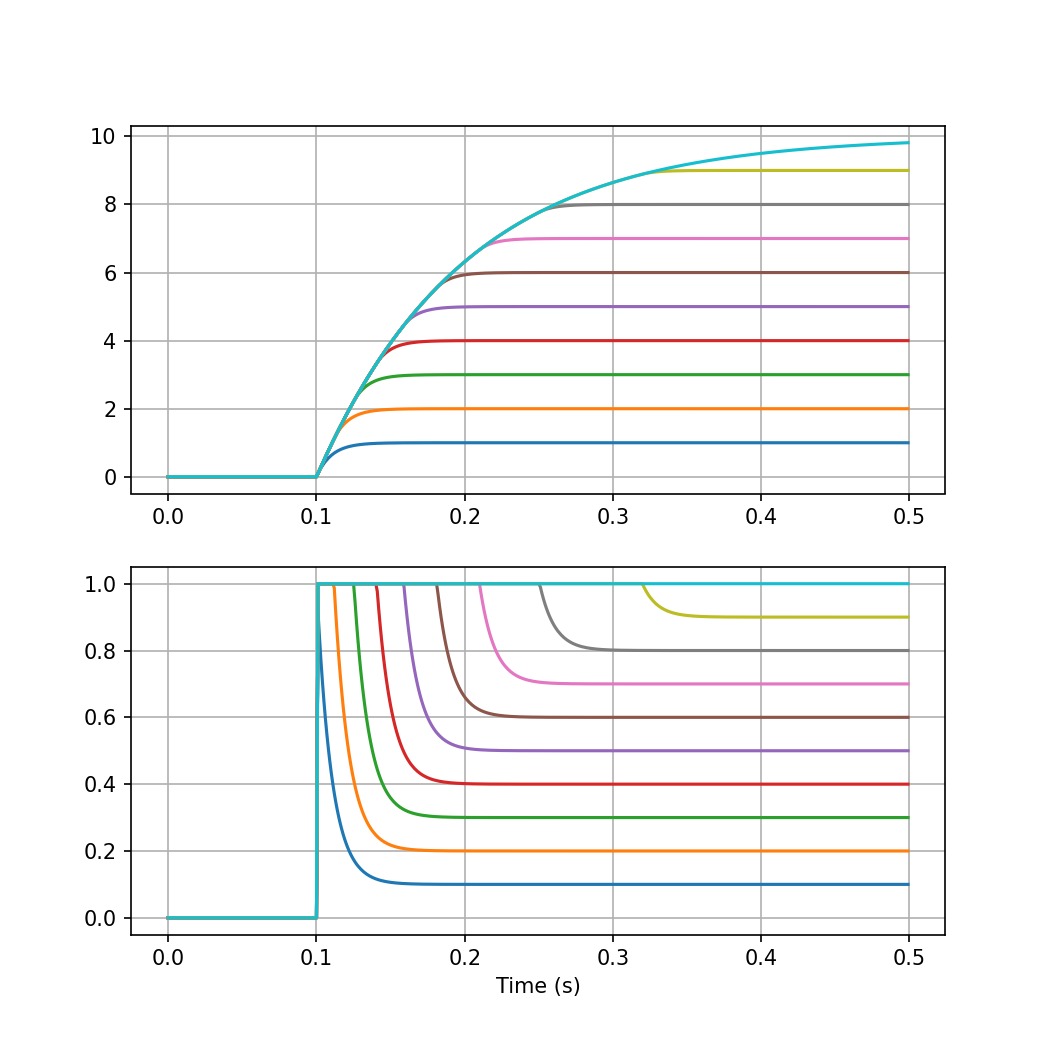

Text(0.5, 0, 'Time (s)')

In [22]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(7, 7))
for i_ref in np.arange(1,11):
    model = sim_iref(i_ref)
    axes[0].plot(model.T,model.get_values('i'), label='$\sf i$')
    axes[1].plot(model.T,model.get_values('v'), label='$\sf i$')

for ax in axes:
    ax.grid()
    #ax.legend()
ax.set_xlabel('Time (s)')
